# Análisis exploratorio de datos

## Unidad 7: Normalización y estandarización de datos

**Índice**   
1. [Normalización y estandarización: conceptos básicos](#id1)
2. [Técnicas de normalización y estandarización de datos](#id2)



### 1. Normalización y estandarización: conceptos básicos <a name="id1"></a>

La normalización y la estandarización de datos son técnicas de escalado de variables (*feature scaling* en inglés) muy comunes en el preproceso de datos. Tienen como objetivo ajustar la escala de los datos para mejorar el rendimiento de los modelos. Este proceso es necesario cuando en un mismo dataset tenemos variables con diferentes rangos, unidades o magnitudes, ya que esta variación puede dar lugar a un modelo poco óptimo o sesgado.

Hay diferentes técnicas de escalado, en las cuales destacan la normalización y la estandarización.

**Normalización**

La normalización es una técnica de escalado en el cual los valores se transforman para que estén entre 0 y 1. También se conoce como *Min-Max scaling*. La idea principal es que todas las variables tengan valores comparables y estén en el mismo rango. Esto es especialmente útil cuando se trabaja con algoritmos que utilizan medidas de distancia, como k-Nearest Neighbors o Support Vector Machines.

La fórmula es:

x_norm = (x - x_min) / (x_max-x_min)

En Python, se usa la función `MinMaxScaler` de la librería scikit-learn para normalizar los datos.


**Estandarización**

Por otro lado, en la estandarización se ajustan los valores de las variables para que tengan una media de 0 y una desviación estándar de 1. Esto hace que las variables sigan una distribución normal estándar.

En este caso, los valores no están restringidos a un rango particular (al contrario que la normalización, que van de 0 a 1).

La fórmula es:

x_stand = (x - x_mean) / (x_std)

Para la estandarización también se usa la librería scikit-learn, concretamente la función `StandardScaler`.

En general, ambas técnicas son útiles para mejorar el rendimiento de los modelos. Por ejemplo, los algoritmos que se basan en distancias, como k-Nearest Neighbors (k-NN) o Support Vector Machines (SVM), son sensibles a las escalas de las variables de modo que, al escalar los datos, se evita que algunas variables dominen o contribuyan demasiado por tener diferente escalas. Por otro lado, con redes neuronales y algoritmos que utilizan técnicas de optimización basadas en gradientes, el escalado de variables puede ayudar a que la convergencia sea más rápida y estable.

La elección entre normalización y estandarización depende del contexto y de los requisitos del modelo ya que ambas técnicas tienen situaciones en las que son más apropiadas.


**Normalización**
- Útil cuando los datos no siguen una distribución normal.

- Esta técnica es sensible a los outliers.

- Mantiene la distribución original de los datos.

- Puede no mantener la relación entre los puntos de datos.


**Estandarización**

- Cuando se trabaja con modelos lineales o algoritmos que asumen normalidad, como la regresión lineal, es mejor estandarizar los datos para que las variables sigan una distribución normal.

- Esta técnica es menos sensible a los outliers.

- No mantiene la distribución original de los datos.

- Mantiene la relación relativa entre las variables que sus valores absolutos.


### 2. Técnicas de normalización y estandarización de datos <a name="id2"></a>

En Python, las técnicas de escalado (normalización y estandarización) están definidas en la librería scikit-learn: `MinMaxScaler` y `StandardScaler`.

Vamos a ver como usar estas funciones en los datos del dataset de starbucks de la clase anterior.

In [1]:
# Montamos la unidad Drive para acceder a los archivos de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Especificamos la ruta hasta la carpeta donde tenemos los archivos de la Unidad 7-8
%cd /content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad7_8

Mounted at /content/drive
/content/drive/MyDrive/Colab_Notebooks/Analisis_exploratorio_datos/Unidad7_8


In [2]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np

# Cargamos el archivo csv en un DataFrame
starbucks_df = pd.read_csv(
    "data/starbucks_df2.csv", encoding='utf-8', encoding_errors='replace'
    )

# Mostramos el tamaño del df
print("Tamaño df:\n", starbucks_df.shape)

# Mostramos el nombre de las columnas
print("Columnas del df:\n", starbucks_df.columns)

# Visualizamos las 3 primeras filas con el comando head()
starbucks_df.head(3)

Tamaño df:
 (110, 14)
Columnas del df:
 Index(['Beverage', 'Beverage_category', 'Beverage_prep', 'Milk_type',
       'Calories', 'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g) ', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g) '],
      dtype='object')


,Beverage,Beverage_category,Beverage_prep,Milk_type,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
0,Brewed Coffee,Coffee,Short,No Milk,3,0.1,0.0,0.0,0,5,0,0,0,0.3
1,Brewed Coffee,Coffee,Tall,No Milk,4,0.1,0.0,0.0,0,10,0,0,0,0.5
2,Brewed Coffee,Coffee,Grande,No Milk,5,0.1,0.0,0.0,0,10,0,0,0,1.0


In [3]:
# Normalización (Min-Max) de las variables numéricas

# Importamos la función MinMax
from sklearn.preprocessing import MinMaxScaler

# Inicializamos el scaler
norm_scaler = MinMaxScaler()

# Variables numéricas del df
var_num = ['Calories', 'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g) ', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g) ']

# Aplicamos la transformación a las variables numéricas
X = norm_scaler.fit_transform(starbucks_df[var_num])

# Creamos un nuevo df con los datos normalizados
starbucks_norm_df = pd.DataFrame(data=X, columns=var_num)
starbucks_norm_df.head(3)

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
0,0.006667,0.014286,0.0,0.0,0.0,0.014706,0.0,0.0,0.0,0.015
1,0.008889,0.014286,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.025
2,0.011111,0.014286,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.050


In [4]:
# Comprobamos que los datos están entre 0 y 1
starbucks_norm_df.describe()

# Podemos ver que la normalización es correcta
# También vemos que la columna Saturated Fat (g) tiene todo 0s!

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,110.000000,110.000000,110.000000,110.0,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
mean,0.359535,0.111429,0.089242,0.0,0.313636,0.342112,0.372121,0.067532,0.371753,0.304909
std,0.225770,0.197975,0.176782,0.0,0.330825,0.266770,0.243599,0.172766,0.247040,0.259601
min,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.014286,0.000000,0.0,0.000000,0.077206,0.200000,0.000000,0.193452,0.100000
50%,0.333333,0.021429,0.016667,0.0,0.500000,0.338235,0.350000,0.000000,0.369048,0.250000
75%,0.488889,0.142857,0.066667,0.0,0.500000,0.500000,0.522222,0.000000,0.508929,0.450000
max,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='Calories', ylabel='Count'>

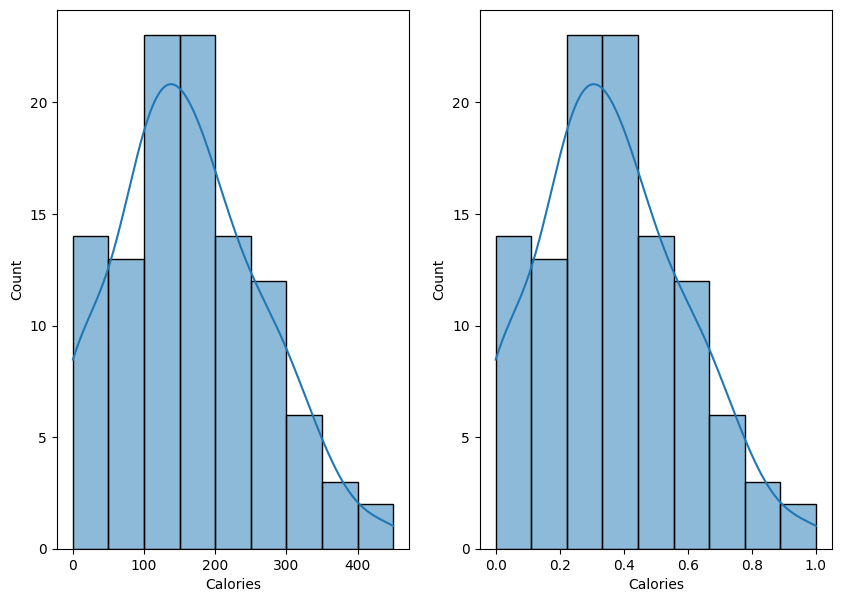

In [5]:
# Cargamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Especificamos el tamaño del subplot
f, axes = plt.subplots(1, 2, figsize=(10,7))

sns.histplot(data=starbucks_df, x="Calories", kde=True, ax=axes[0])
sns.histplot(data=starbucks_norm_df, x="Calories", kde=True,  ax=axes[1])

# Misma distribución pero los rangos son diferentes!

In [6]:
# Introducimos valores anómalos en una variable

# Normalización (Min-Max) de las variables numéricas

# Añadimos algunos outliers
starbucks_outliers_df = starbucks_df.copy()
starbucks_outliers_df.loc[10, 'Calories'] = -100
starbucks_outliers_df.loc[250, 'Calories'] = 1000


# Importamos la función MinMax
from sklearn.preprocessing import MinMaxScaler

# Inicializamos el scaler
norm_scaler = MinMaxScaler()

# Variables numéricas del df
var_num = ['Calories', 'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g) ', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g) ']

# Aplicamos la transformación a las variables numéricas
X = norm_scaler.fit_transform(starbucks_outliers_df[var_num])

# Creamos un nuevo df con los datos normalizados
starbucks_norm_outliers_df = pd.DataFrame(data=X, columns=var_num)
starbucks_norm_outliers_df.head(3)

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
0,0.093636,0.014286,0.0,0.0,0.0,0.014706,0.0,0.0,0.0,0.015
1,0.094545,0.014286,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.025
2,0.095455,0.014286,0.0,0.0,0.0,0.029412,0.0,0.0,0.0,0.050


<Axes: xlabel='Calories', ylabel='Count'>

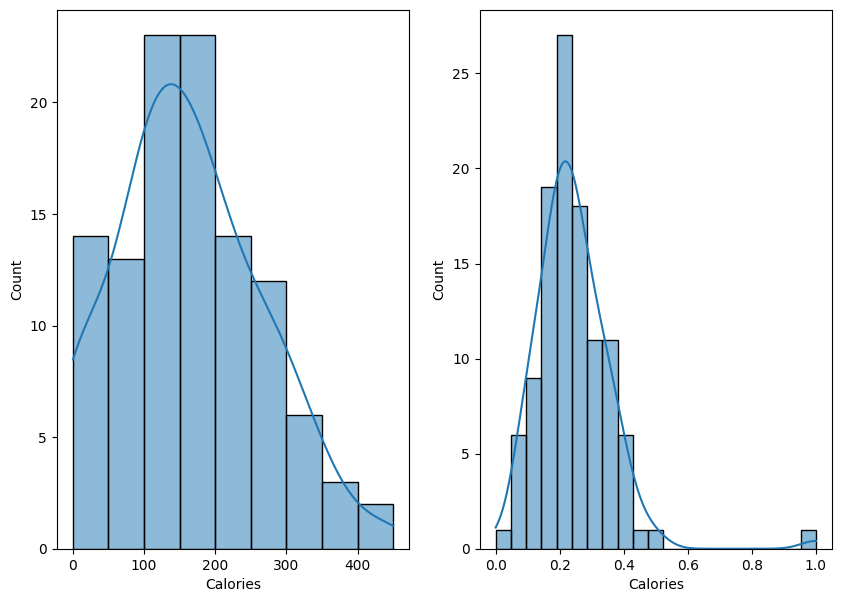

In [7]:
# Cargamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Especificamos el tamaño del subplot
f, axes = plt.subplots(1, 2, figsize=(10,7))

sns.histplot(data=starbucks_df, x="Calories", kde=True, ax=axes[0])
sns.histplot(data=starbucks_norm_outliers_df, x="Calories", kde=True,  ax=axes[1])

# Los outliers afectan a la distribución!

In [8]:
# Estandarizamos las variables numéricas

# Importamos la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Inicializamos el scaler
scaler = StandardScaler()

# Variables numéricas del df
var_num = ['Calories', 'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g) ', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g) ']

# Aplicamos la transformación a las variables numéricas
X = scaler.fit_transform(starbucks_df[var_num])

# Creamos un nuevo df con los datos estandarizados
starbucks_estand_df = pd.DataFrame(data=X, columns=var_num)
starbucks_estand_df.head(3)

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
0,-1.570109,-0.492928,-0.507128,0.0,-0.952381,-1.232913,-1.534592,-0.392679,-1.51172,-1.121860
1,-1.560221,-0.492928,-0.507128,0.0,-0.952381,-1.177536,-1.534592,-0.392679,-1.51172,-1.083163
2,-1.550333,-0.492928,-0.507128,0.0,-0.952381,-1.177536,-1.534592,-0.392679,-1.51172,-0.986421


In [9]:
# Comprobamos que los datos están bien estandarizados
# Media 0 y desviación estándard de 1
starbucks_estand_df.describe()

# Podemos ver que la estandarización es correcta
# También vemos que la columna Saturated Fat (g) tiene todo 0s!

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
count,1.100000e+02,1.100000e+02,1.100000e+02,110.0,1.100000e+02,1.100000e+02,1.100000e+02,1.100000e+02,1.100000e+02,1.100000e+02
mean,8.578996e-17,1.564405e-16,-5.853903e-17,0.0,3.633457e-17,8.679925e-17,-4.239033e-17,3.431598e-17,1.009294e-17,1.299466e-16
std,1.004577e+00,1.004577e+00,1.004577e+00,0.0,1.004577e+00,1.004577e+00,1.004577e+00,1.004577e+00,1.004577e+00,1.004577e+00
min,-1.599773e+00,-5.654172e-01,-5.071279e-01,0.0,-9.523812e-01,-1.288291e+00,-1.534592e+00,-3.926794e-01,-1.511720e+00,-1.179905e+00
25%,-6.109825e-01,-4.929278e-01,-5.071279e-01,0.0,-9.523812e-01,-9.975574e-01,-7.098112e-01,-3.926794e-01,-7.250533e-01,-7.929358e-01
50%,-1.165874e-01,-4.566831e-01,-4.124181e-01,0.0,5.659077e-01,-1.459963e-02,-9.122574e-02,-3.926794e-01,-1.100233e-02,-2.124815e-01
75%,5.755659e-01,1.594766e-01,-1.282887e-01,0.0,5.659077e-01,5.945573e-01,6.190021e-01,-3.926794e-01,5.578180e-01,5.614577e-01
max,2.849784e+00,4.508839e+00,5.175460e+00,0.0,2.084196e+00,2.477406e+00,2.589311e+00,5.421996e+00,2.554740e+00,2.689790e+00


<Axes: xlabel='Calories', ylabel='Count'>

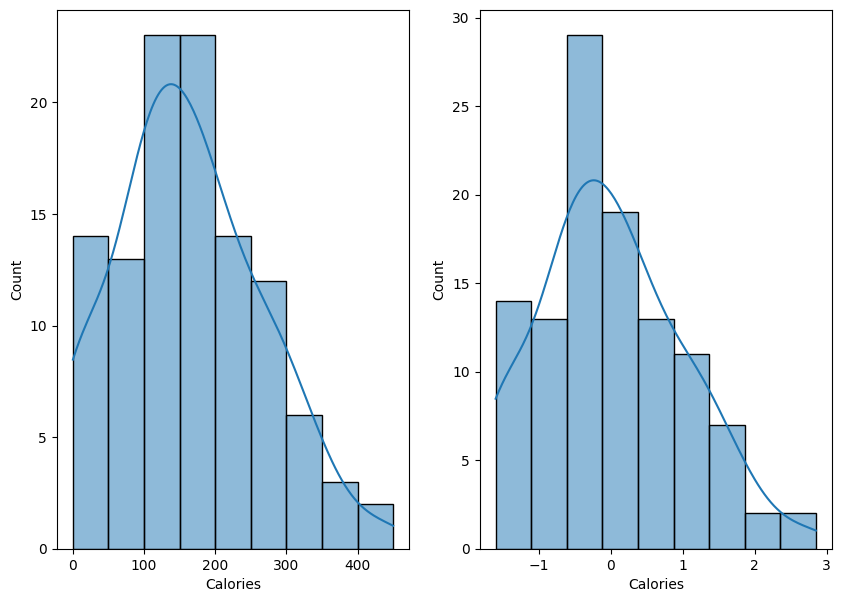

In [10]:
# Cargamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Especificamos el tamaño del subplot
f, axes = plt.subplots(1, 2, figsize=(10,7))

sns.histplot(data=starbucks_df, x="Calories", kde=True, ax=axes[0])
sns.histplot(data=starbucks_estand_df, x="Calories", kde=True,  ax=axes[1])

# La distribución ahora es diferente, no se mantiene igual!

In [11]:
# Estandarizamos las variables numéricas

# Importamos la función StandardScaler
from sklearn.preprocessing import StandardScaler

# Añadimos algunos outliers
starbucks_outliers_df = starbucks_df.copy()
starbucks_outliers_df.loc[10, 'Calories'] = -100
starbucks_outliers_df.loc[250, 'Calories'] = 1000

# Inicializamos el scaler
scaler = StandardScaler()

# Variables numéricas del df
var_num = ['Calories', 'Total Fat (g)', 'Trans Fat (g) ', 'Saturated Fat (g)',
       'Sodium (mg)', 'Total Carbohydrates (g) ', 'Cholesterol (mg)',
       'Dietary Fibre (g)', 'Sugars (g)', 'Protein (g) ']

# Aplicamos la transformación a las variables numéricas
X = scaler.fit_transform(starbucks_outliers_df[var_num])

# Creamos un nuevo df con los datos estandarizados
starbucks_estand_outliers_df = pd.DataFrame(data=X, columns=var_num)
starbucks_estand_outliers_df.head(3)

,Calories,Total Fat (g),Trans Fat (g),Saturated Fat (g),Sodium (mg),Total Carbohydrates (g),Cholesterol (mg),Dietary Fibre (g),Sugars (g),Protein (g)
0,-1.252548,-0.492928,-0.507128,0.0,-0.952381,-1.232913,-1.534592,-0.392679,-1.51172,-1.121860
1,-1.244885,-0.492928,-0.507128,0.0,-0.952381,-1.177536,-1.534592,-0.392679,-1.51172,-1.083163
2,-1.237222,-0.492928,-0.507128,0.0,-0.952381,-1.177536,-1.534592,-0.392679,-1.51172,-0.986421


<Axes: xlabel='Calories', ylabel='Count'>

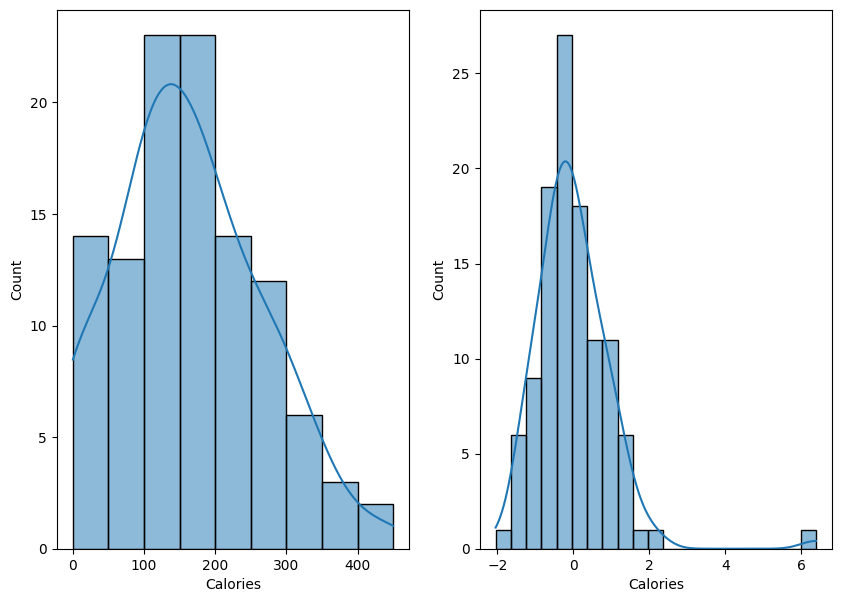

In [12]:
# Cargamos las librerías necesarias
import matplotlib.pyplot as plt
import seaborn as sns

# Especificamos el tamaño del subplot
f, axes = plt.subplots(1, 2, figsize=(10,7))

sns.histplot(data=starbucks_df, x="Calories", kde=True, ax=axes[0])
sns.histplot(data=starbucks_estand_outliers_df, x="Calories", kde=True,  ax=axes[1])

# La distribución también se ve impactado por los outliers